In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Reading dataset
df = pd.read_csv("data.csv")
# describe the dataset before cleaning
print("before cleaning")
print(df.describe())
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)
# after cleaning
print("after cleaning")
print(df.describe())

before cleaning
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
after cleaning
         Duration       Pulse    Maxpulse     Calories
count  162.000000  162.000000  162.000000   162.000000
mean    64.197531  107.709877  134.265432   377.593210
std     43.151882   14.711588   16.471618   267.291955
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   255.075000
50%     60.000000  105.500000  131.000000   320.400000
75%     60.000000  111.000000  141.000000   386.700000
max    300.000000  159.000000  184

In [5]:
# adding a new column (categories for calories: few, normal or high)
q_1 = df['Calories'].quantile(q=0.25)
q_2 = df['Calories'].median()
q_3 = df['Calories'].quantile(q=0.75)
q_4 = df['Calories'].max()
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])
print(df.info())
print(df.groupby(['Category']).mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Duration  162 non-null    int64   
 1   Pulse     162 non-null    int64   
 2   Maxpulse  162 non-null    int64   
 3   Calories  162 non-null    float64 
 4   Category  162 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 6.6 KB
None
            Duration       Pulse    Maxpulse    Calories
Category                                                
few        35.000000  106.951220  130.146341  185.634146
normal     55.125000  108.725000  135.737500  318.951250
high      111.097561  106.487805  135.512195  683.975610


In [19]:
# applying label encoding on category feature
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Category'])
print(integer_encoded)
#Replace categories values with encoded labels
df["Category"].replace(to_replace=df["Category"].tolist(), value=integer_encoded, inplace = True)
df.head()

,Duration,Pulse,Maxpulse,Calories,Category
0,60,110,130,409.1,1
1,60,117,145,479.0,1
2,60,103,135,340.0,2
3,45,109,175,282.4,2
4,45,117,148,406.0,1


          Duration     Pulse  Maxpulse  Calories  Category
Duration  1.000000 -0.162098  0.003578  0.922754  0.081476
Pulse    -0.162098  1.000000  0.787035  0.018594  0.056952
Maxpulse  0.003578  0.787035  1.000000  0.196884  0.129821
Calories  0.922754  0.018594  0.196884  1.000000  0.088722
Category  0.081476  0.056952  0.129821  0.088722  1.000000


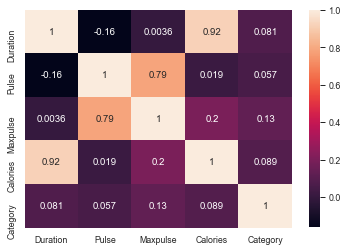

In [20]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

Correlation between Duration and Category: 0.08
Independent t-test: 18.56604980653306 7.977320437537995e-53


Text(0.5, 1.0, 'Independent T-Test')

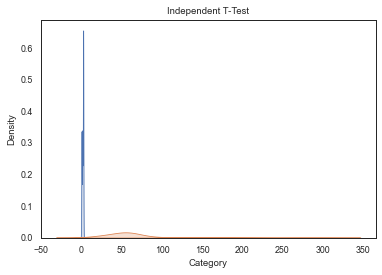

In [21]:
# print the correlation coefficient from the matrix
corr_coef = np.corrcoef(df["Duration"], df["Category"])[0, 1]
print("Correlation between Duration and Category:", round(corr_coef, 2))

# with t-test we check if the mean of the two groups are truly different
ttest, pval = stats.ttest_ind(df["Duration"], df["Category"])
print("Independent t-test:", ttest, pval)

sns.kdeplot(df["Category"], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

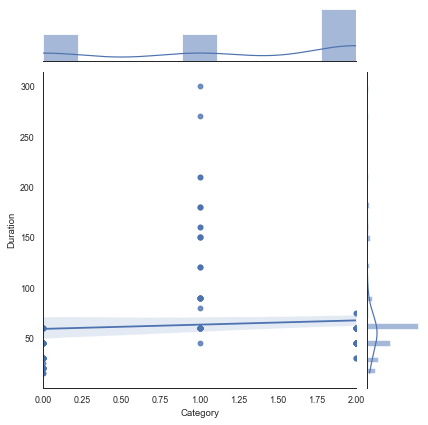

In [22]:
#Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Category", y="Duration", data=df)
plt.show()

In [68]:
# applying one-hot encoder

# Reading dataset
df = pd.read_csv("data.csv")
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)

# adding a new column (categories for calories: few, normal or high)
q_1 = df['Calories'].quantile(q=0.25)
q_2 = df['Calories'].median()
q_3 = df['Calories'].quantile(q=0.75)
q_4 = df['Calories'].max()
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])

In [69]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, categories='auto', handle_unknown='error', drop='first')
integer_encoded = label_encoder.fit_transform(df['Category'])
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# onehotencoder_df = pd.DataFrame(onehot_encoded)
# df = df.join(onehotencoder_df)
# df.drop(columns=['Category'], inplace=True)
# df

[[1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [1]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]
 [0]
 [2]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
